## ML 

### 1.problem statement
### 2.dr&dc
### 3.data understasnding
### 4.data preparation
### 5.model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("auto-mpg.csv")

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
df.drop("car name",axis=1)

KeyError: "['car name'] not found in axis"

In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [18]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [124]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
median1=df["Age"].median()
median1

28.0

In [126]:
df["Age"]=df["Age"].replace(np.nan,median1)

In [127]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
mode1=df["Embarked"].mode().values[0]
mode1

'S'

In [129]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [130]:
df=df.drop("Cabin",axis=1)

In [131]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Age'>

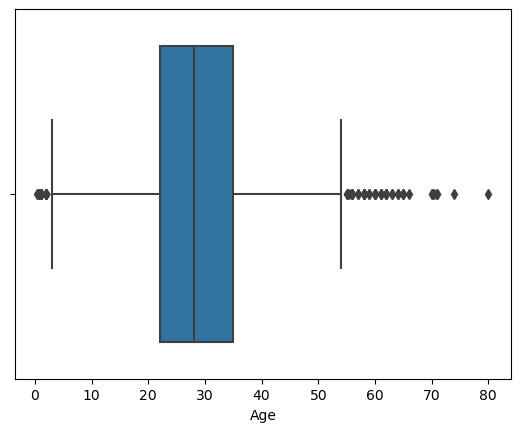

In [132]:
sns.boxplot(x="Age",data=df)

In [133]:
duplicate=df.duplicated()
duplicate.sum()

0

In [134]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [135]:
lowAge,upAge=remove_outlier(df["Age"])
df["Age"]=np.where(df["Age"]>upAge,upAge,df["Age"])
df["Age"]=np.where(df["Age"]<lowAge,lowAge,df["Age"])

<Axes: xlabel='Fare'>

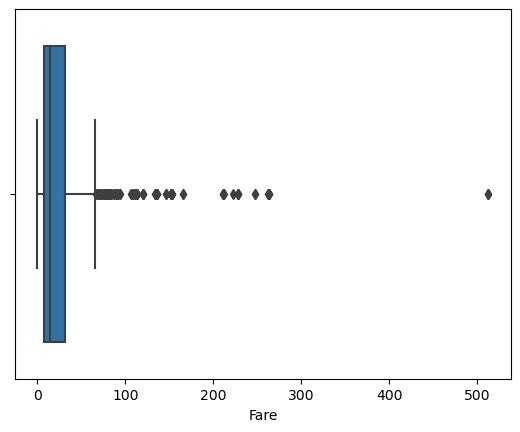

In [136]:
sns.boxplot(x="Fare",data=df)

In [137]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [138]:
lowAge,upAge=remove_outlier(df["Age"])
df["Fare"]=np.where(df["Fare"]>upAge,upAge,df["Fare"])
df["Fare"]=np.where(df["Fare"]<lowAge,lowAge,df["Fare"])

<Axes: xlabel='Fare'>

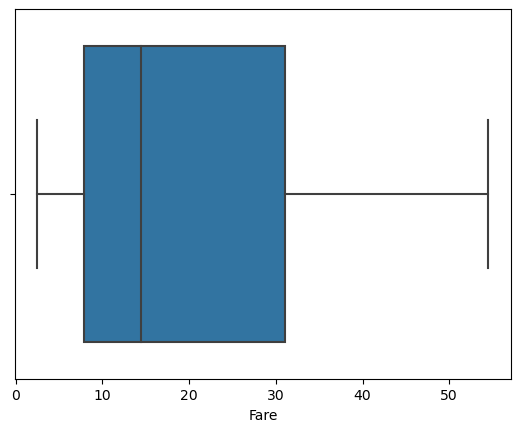

In [139]:
sns.boxplot(x="Fare",data=df)

In [140]:
df=df.drop(["PassengerId","Name","Ticket"],axis=1)


In [141]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [145]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [143]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [144]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.250,False,True,False,False,True
1,1,1,38.0,1,0,54.500,True,False,True,False,False
2,1,3,26.0,0,0,7.925,True,False,False,False,True
3,1,1,35.0,1,0,53.100,True,False,False,False,True
4,0,3,35.0,0,0,8.050,False,True,False,False,True
